In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/Users/harsha/Desktop/STEALTH/Dataset/Linux_system_Logs.csv')

In [6]:
def refined_classify_log_type(row):
    process = row['Process'].lower()
    message = row['LogMessage'].lower()
    
    if 'kernel' in process:
        return 'Kernel Log'
    elif 'syslog' in process:
        return 'System Log'
    elif 'sshd' in process or 'pam_unix' in process:
        return 'SSH Log'
    elif 'authentication failure' in message:
        return 'Authentication Failure'
    elif 'out of memory' in message:
        return 'Memory Management Log'
    else:
        # Catch-all for logs that don't fit into known categories
        return 'Specific System Log'

data['Log Type'] = data.apply(refined_classify_log_type, axis=1)
data.head()

,Month,Date,Timestamp,Hostname,Process,LogMessage,Log Type
0,Jun,9,06:06:20,combo,syslogd 1.4.1,restart.,System Log
1,Jun,9,06:06:20,combo,syslog,syslogd startup succeeded,System Log
2,Jun,9,06:06:20,combo,syslog,klogd startup succeeded,System Log
3,Jun,9,06:06:20,combo,kernel,"klogd 1.4.1, log source = /proc/kmsg started.",Kernel Log
4,Jun,9,06:06:20,combo,kernel,Linux version 2.6.5-1.358 (bhcompile@bugs.buil...,Kernel Log


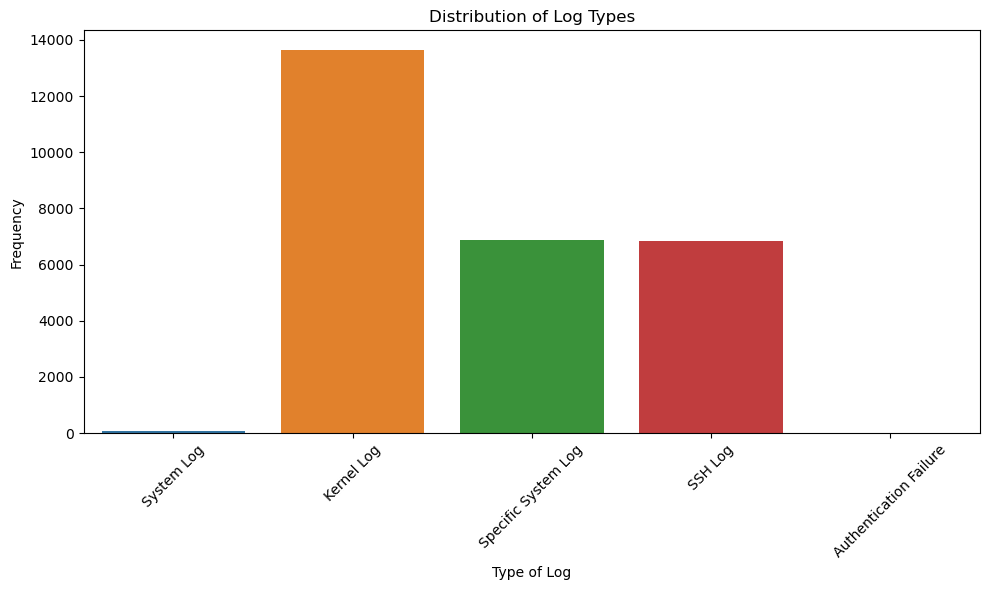

In [7]:
# Visualization 1: Distribution of Log Types
plt.figure(figsize=(10, 6))
sns.countplot(x='Log Type', data=data)
plt.title('Distribution of Log Types')
plt.xlabel('Type of Log')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Parse 'DateTime' from 'Month' and 'Date'
data['DateTime'] = pd.to_datetime(data['Month'] + ' ' + data['Date'].astype(str) + ' 2022', format='%b %d %Y')

# Feature Engineering: Extracting Day of Week and Hour of Day
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['HourOfDay'] = data['DateTime'].dt.hour

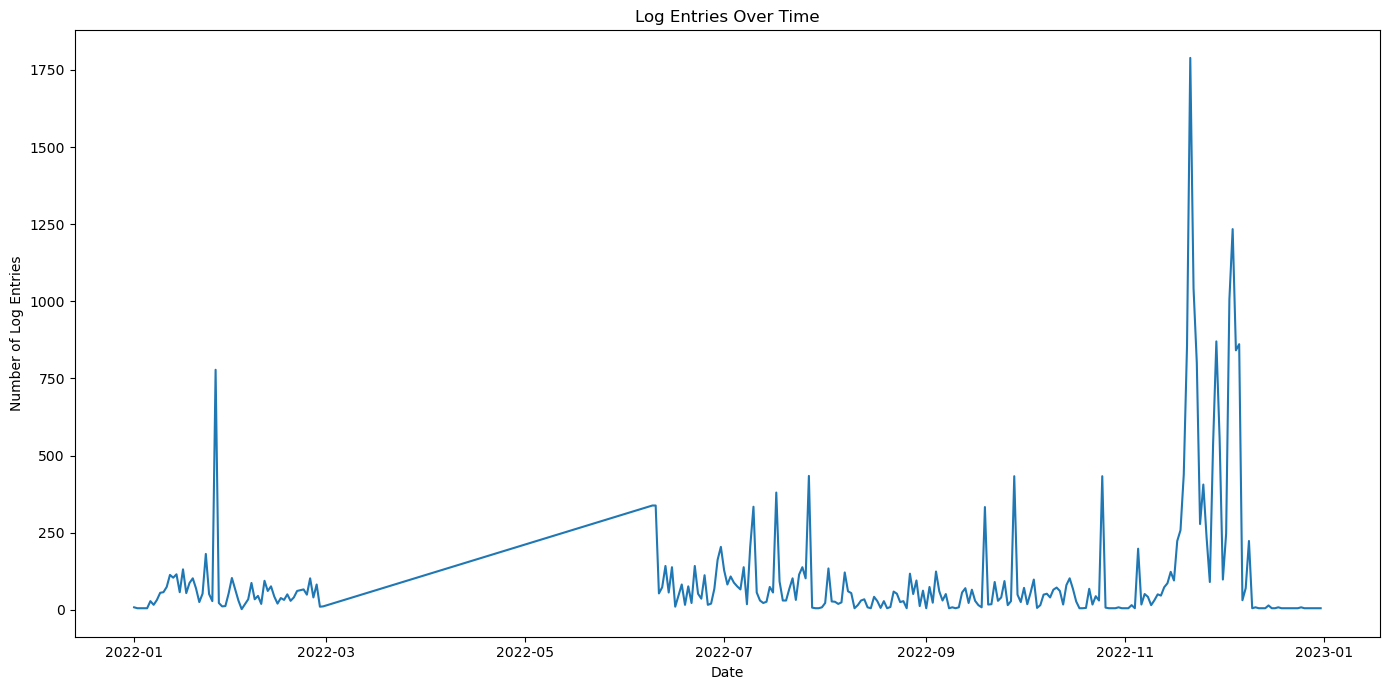

In [10]:
# Visualization 2: Log Entries Over Time
# Assuming 'DateTime' is in the correct datetime format already and we just extract the date for plotting
data['Date'] = data['DateTime'].apply(lambda x: x.date())
plt.figure(figsize=(14, 7))
data.groupby('Date').size().plot()
plt.title('Log Entries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Log Entries')
plt.tight_layout()
plt.show()